In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [3]:
# Load Iris Dataset from URL manually (no sklearn.datasets)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=columns)


In [4]:
# Encode class labels
df['class'] = df['class'].astype('category').cat.codes  # 0, 1, 2

# Features and labels
X = df.drop('class', axis=1).values
y = df['class'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# -------- PCA -----------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression on PCA
clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

In [6]:
# -------- LDA -----------
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train logistic regression on LDA
clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)



🔍 Evaluation Report for PCA + Logistic Regression:
Accuracy: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



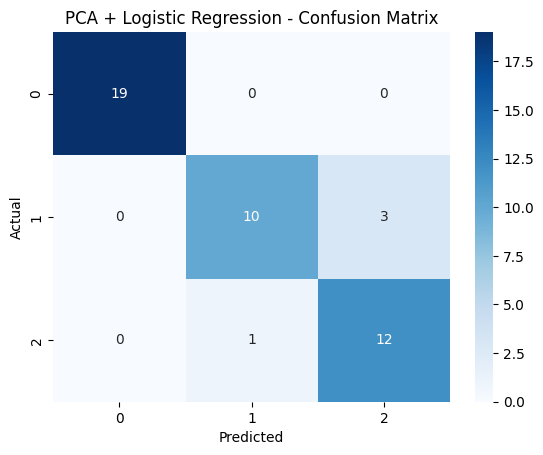


🔍 Evaluation Report for LDA + Logistic Regression:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



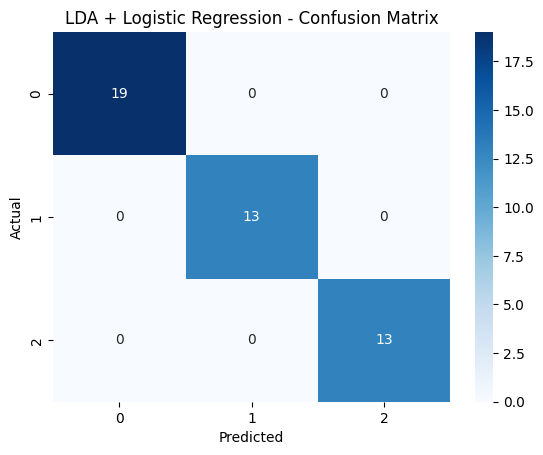

In [7]:
# ---------------- Evaluation ----------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation Report for {name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate PCA model
evaluate_model("PCA + Logistic Regression", y_test, y_pred_pca)

# Evaluate LDA model
evaluate_model("LDA + Logistic Regression", y_test, y_pred_lda)
